In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 256
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1000 		 0.02 		 0.08 |
| 1000 		 0.09 		 0.2 |
| 1000 		 0.18 		 0.0 |
| 1000 		 0.29 		 0.2 |
| 1000 		 0.18 		 0.35 |
| 1000 		 0.42 		 0.07 |
| 1000 		 0.14 		 0.14 |
| 1000 		 0.36 		 0.15 |
| 1000 		 0.04 		 0.21 |
| 1000 		 0.05 		 0.07 |
| 1000 		 0.06 		 0.17 |
| 1000 		 0.15 		 0.43 |
| 1000 		 0.14 		 0.0 |
| 1000 		 0.32 		 0.42 |
| 1000 		 0.35 		 0.1 |
| 1000 		 0.22 		 0.18 |
| 1000 		 0.12 		 0.15 |
| 1000 		 0.04 		 0.09 |
| 1000 		 0.35 		 0.21 |
-------------------------------------
The s.d. of M is: 0.0
The s.d. of E is: 0.15
The s.d. of I is: 0.14
-------------------------------------
The mean of M is: 1000
The mean of E is: 0.21
The mean of I is: 0.21
-------------------------------------


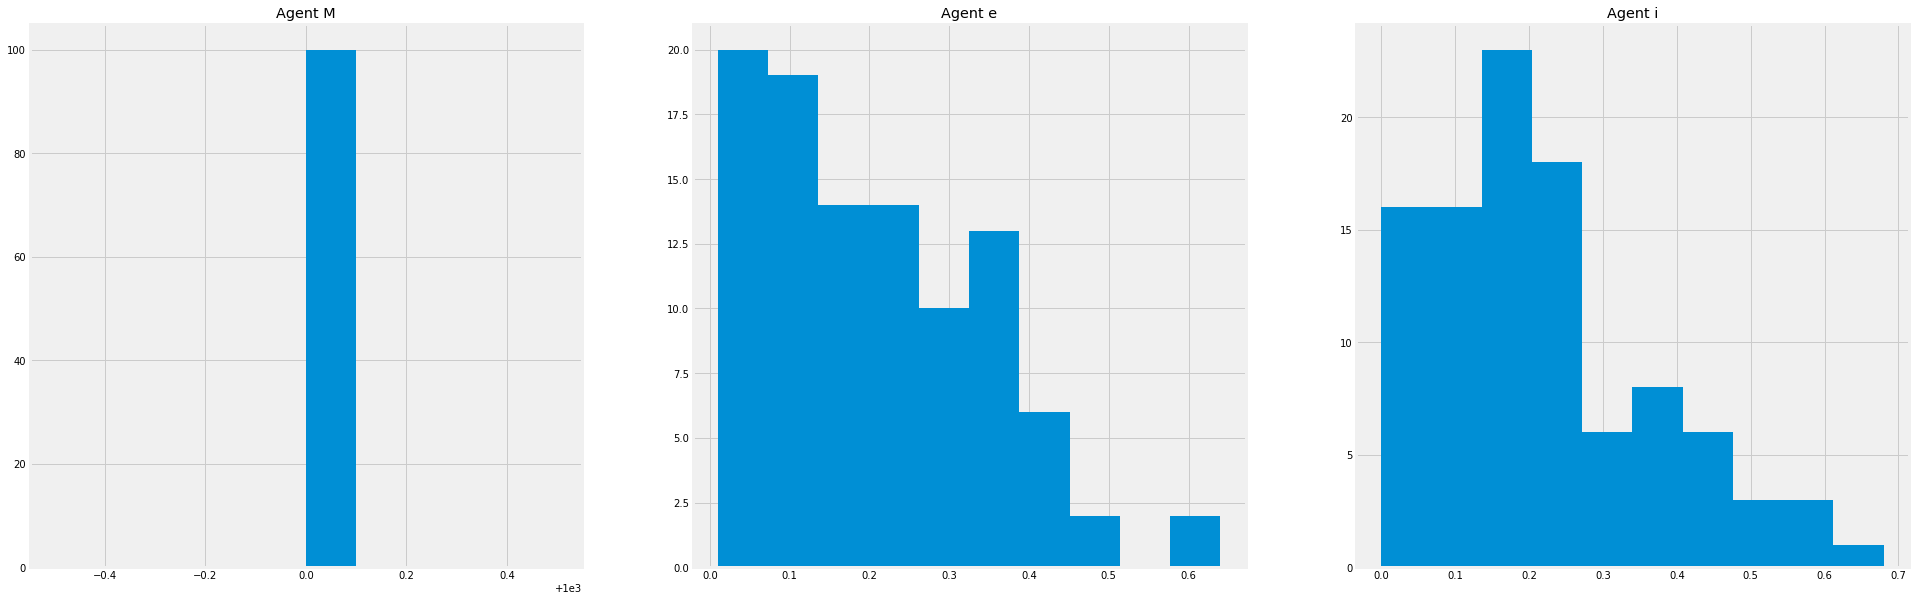

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 13.0, Temptation: 20.0, Sucker: -7.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 86.0, Temptation: 90.0, Sucker: -4.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 6.0, Temptation: 20.0, Sucker: -14.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 180.0, Temptation: 180.0, Sucker: -0.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: -3.0, Temptation: 20.0, Sucker: -23.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 286.0, Temptation: 290.0, Sucker: 

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 1/10000]
E = [0.1, 0.2]
I = [0.1, 0.2]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

Tournament has started...
Tournament has ended. The simulation took 32 minutes.
    S.D.  Counts Seed
0    0.5     256  256
1    0.6     252  256
2    0.7     235  256
3    0.8     232  256
4    0.9     224  256
5    1.0     215  256
6    1.1     195  256
7    1.2     171  256
8    1.3     140  256
9    1.4     115  256
10   1.5     100  256
11   1.6      85  256
12   1.7      65  256
13   1.8      52  256
14   1.9      44  256
15   2.0      34  256
16   2.1      21  256
17   2.2      18  256
18   2.3      11  256
19   2.4       5  256
20   2.5       2  256
21   2.6       2  256
22   2.7       2  256
23   2.8       1  256
24   2.9       0  256
25   3.0       0  256


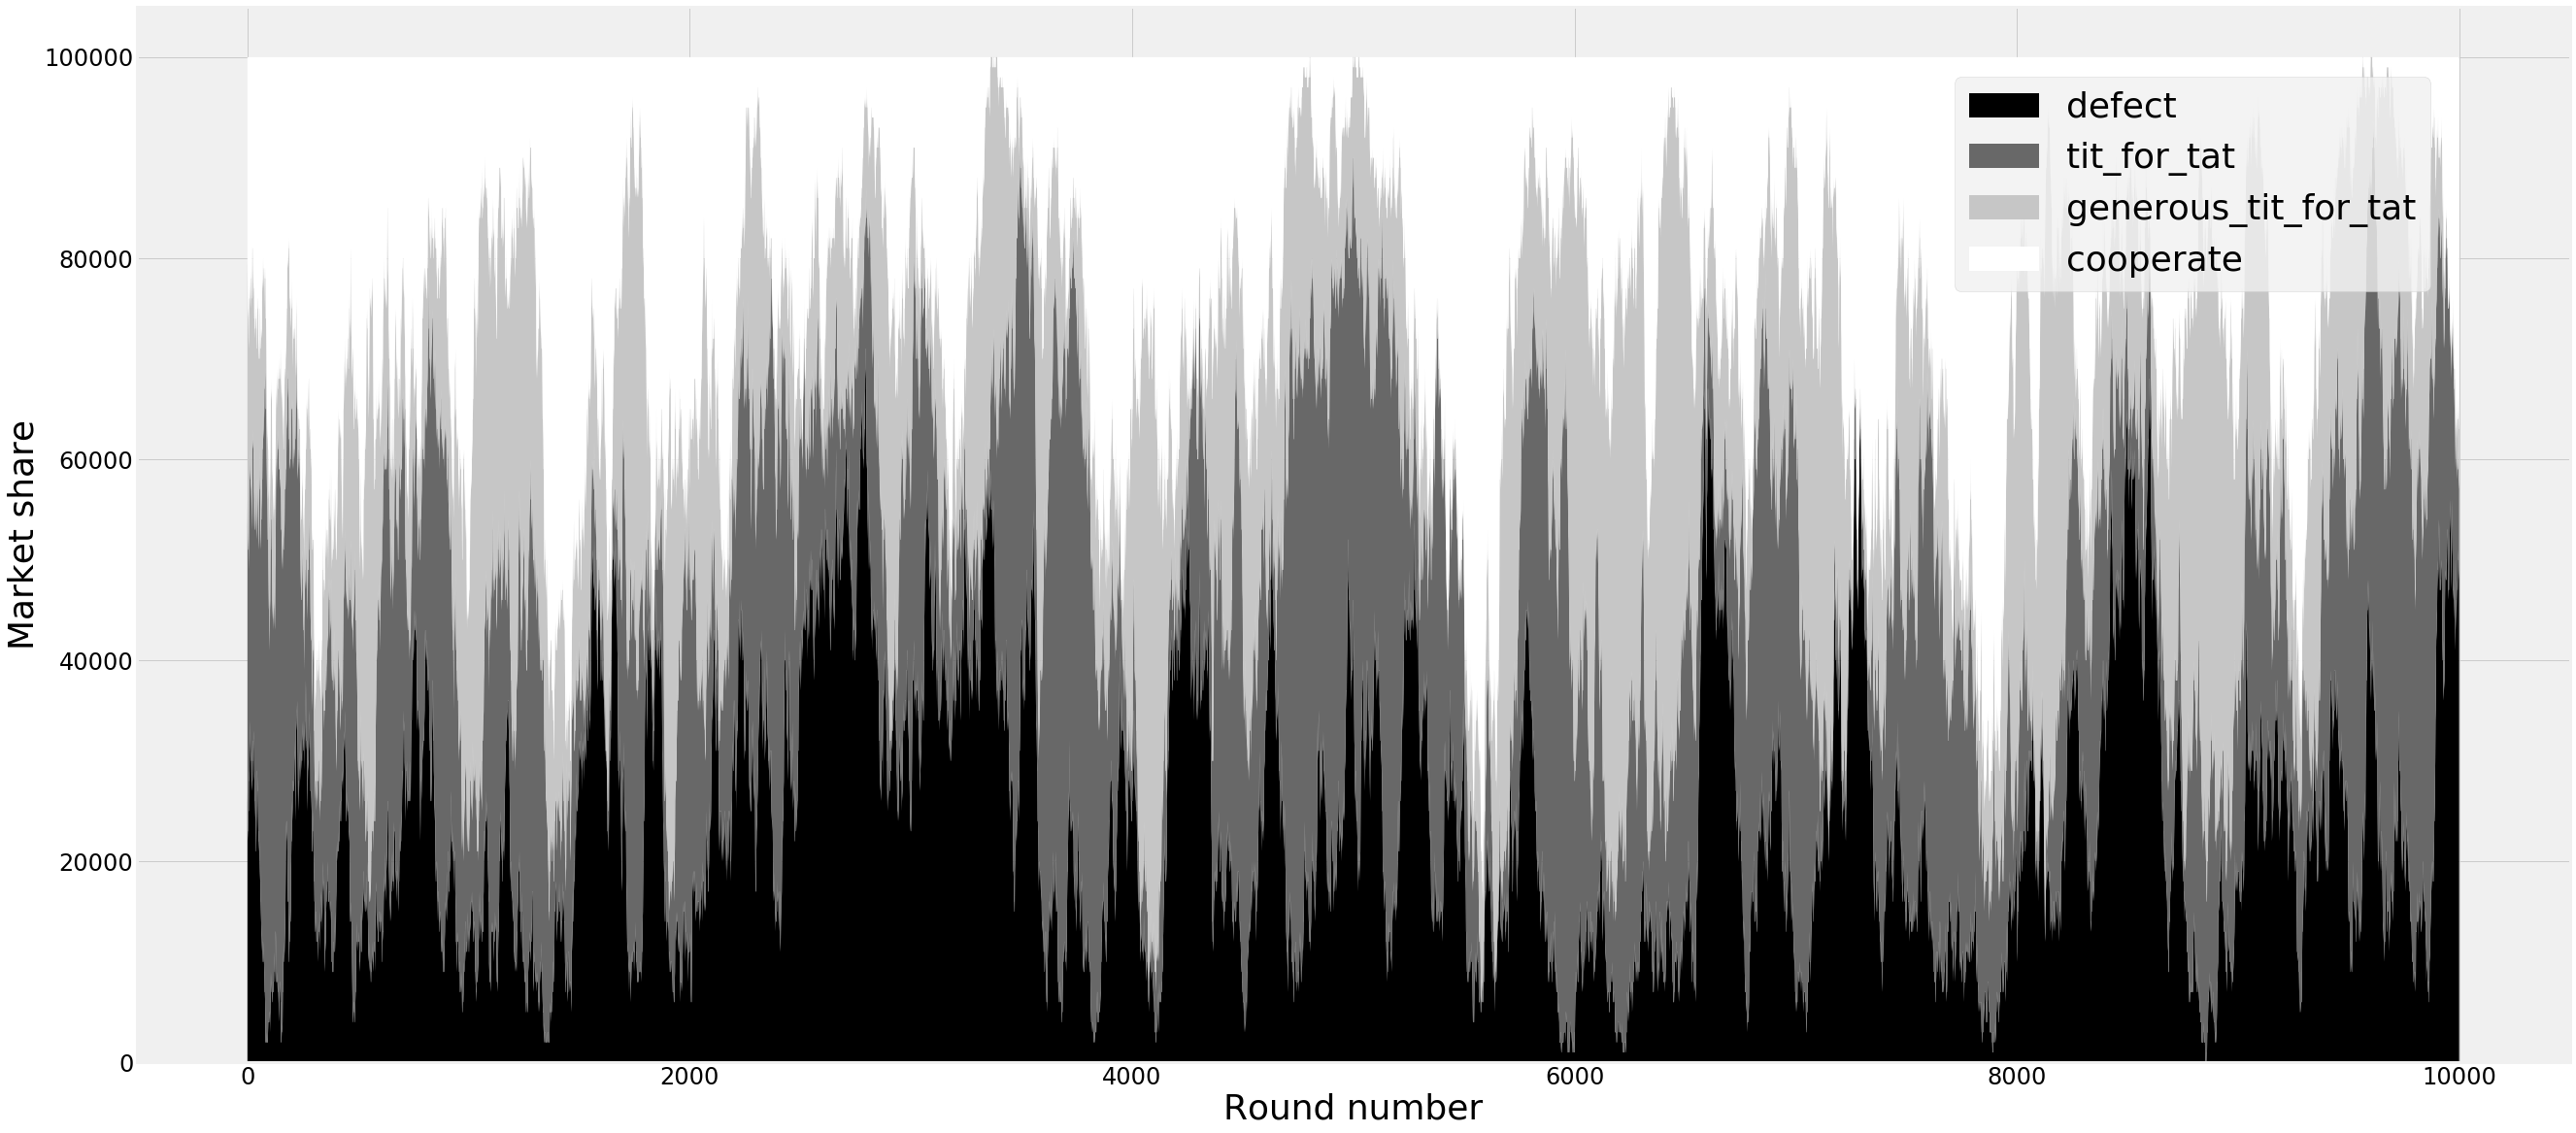

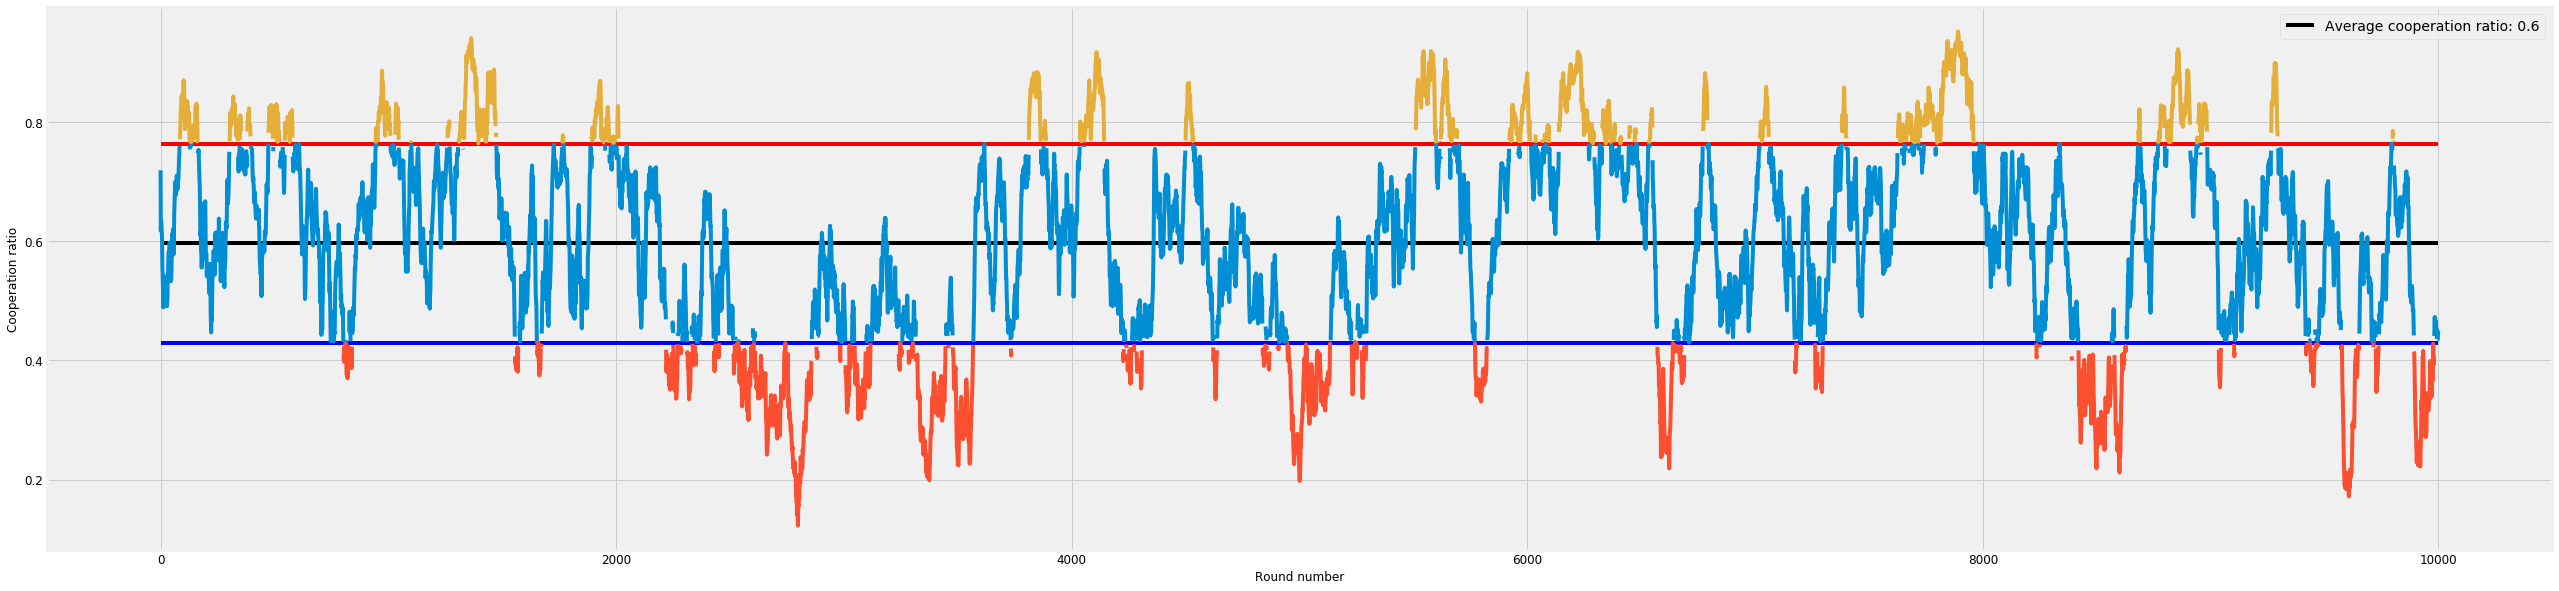

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values()), 'Seed': str(seed)}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "_changing_sdei", seed = str(seed))